# Spotify 2023 Dataset Analysis

In this notebook, we will load the Spotify 2023 dataset and explore its structure by displaying the number of rows and columns.

## Import Libraries

We will begin by importing the necessary libraries for data analysis and visualization.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with latin1 encoding
df = pd.read_csv('dataset/spotify-2023.csv', encoding='latin1')

# Get the number of rows and columns
rows, columns = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')


Number of rows: 953
Number of columns: 24


## Check Data Types and Missing Values

In this step, we will examine the data types of each column in the dataset and identify any missing values. Understanding the data types helps in determining how we can manipulate and analyze the data effectively.

### Print Data Types

We will display the data types of each column to understand the nature of the data we are working with. This will help us identify which columns may require conversion or preprocessing.



In [2]:
# Print the data types of each column
print("Data types of each column:")
print(df.dtypes)

# Get and print the number of missing values for each column
missing_values = df.isnull().sum()
print("\nNumber of missing values in each column (only non-zero counts):")
print(missing_values[missing_values > 0])


Data types of each column:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Number of missing values in each column (only non-zero counts):
in_shazam_charts    50
key                 95
dtype: int64


## Handle Missing Values in Key Column

In this step, we will address the missing values in the 'key' column of our dataset. Since 'key' is an important feature for our analysis, we will replace any missing values with the most frequent value (mode) from that column. This approach helps maintain the integrity of the data while allowing us to proceed with our analysis.

### Replace Missing Values

We will first calculate the most frequent value in the 'key' column using the `mode()` function. Then, we will fill any missing values in the 'key' column with this most frequent value.


In [3]:
# Replace missing values in the 'key' column with the most frequent value
most_frequent_value = df['key'].mode()[0]
df['key'] = df['key'].fillna(most_frequent_value)

# Verify that there are no more missing values in 'key'
print(df['key'].isnull().sum())  # Should print 0 if all missing values are filled


0


## Statistical Analysis of Streams Column

In this step, we will perform a statistical analysis on the 'streams' column of our dataset. Specifically, we will calculate the mean, median, and standard deviation. These statistics provide insight into the distribution and variability of the streaming data.

### Convert Streams to Numeric

First, we will ensure that the 'streams' column is in a numeric format. Any non-numeric entries will be converted to NaN, allowing us to drop these rows from the analysis.


In [4]:
# Convert 'streams' to numeric and drop rows with NaN values
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df = df.dropna(subset=['streams'])

# Calculate and print statistics for 'streams'
mean_streams = df['streams'].mean()
median_streams = df['streams'].median()
std_dev_streams = df['streams'].std()

print(f"Mean of 'streams': {mean_streams}")
print(f"Median of 'streams': {median_streams}")
print(f"Standard Deviation of 'streams': {std_dev_streams}")


Mean of 'streams': 514137424.93907565
Median of 'streams': 290530915.0
Standard Deviation of 'streams': 566856949.038883


## Distribution Analysis of Released Year and Artist Count

In this step, we will analyze the distribution of the 'released_year' and 'artist_count' columns in our dataset. Understanding the trends in music releases over the years and the number of artists associated with the tracks can provide valuable insights into the dataset.

### Distribution of Released Year

We will visualize the distribution of the 'released_year' using a histogram. This visualization allows us to see the frequency of tracks released across different years. By examining the histogram, we can identify trends, such as which years had the most releases and if there are any noticeable peaks or declines. 

### Distribution of Artist Count

To analyze the 'artist_count', we will use a bar graph. This type of visualization is effective for displaying the frequency of tracks that feature a specific number of artists. By plotting the artist counts in a bar graph, we can easily see how many tracks belong to each category, which will help us identify trends related to collaborations in music.


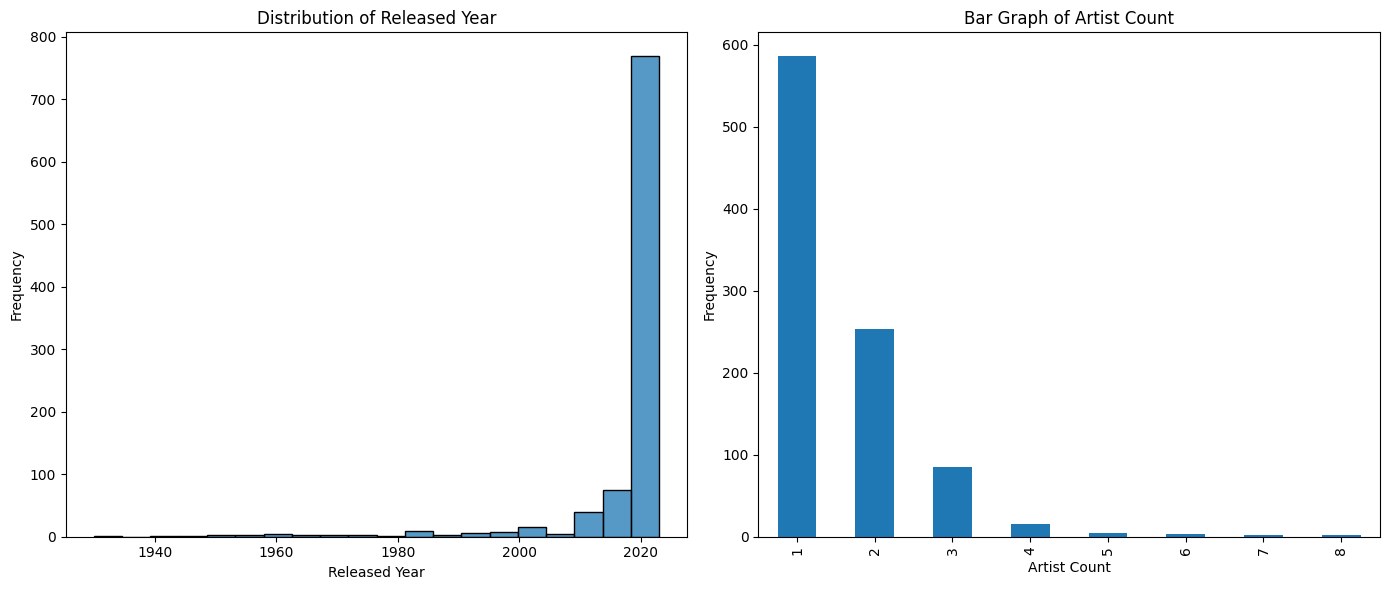

In [5]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Histogram for 'released_year'
plt.subplot(1, 2, 1)
sns.histplot(df['released_year'].dropna(), bins=20, kde=False)
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Frequency')

# Bar graph for 'artist_count'
plt.subplot(1, 2, 2)
df['artist_count'].dropna().value_counts().sort_index().plot(kind='bar')
plt.title('Bar Graph of Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Identifying the Most Streamed Tracks

In this step, we will determine which track has the highest number of streams in our dataset and display the top 5 most streamed tracks. This analysis will help us identify popular songs and understand listener preferences.

### Track with the Highest Streams

We will find the track with the highest streams by using the `idxmax()` function, which returns the index of the maximum value in the 'streams' column. Once we have this information, we will display the track name, artist name, and the number of streams for the most streamed track.

### Top 5 Most Streamed Tracks

Next, we will display the top 5 tracks with the highest stream counts. This will be done using the `nlargest()` function, which allows us to select the top entries based on the 'streams' column.


In [6]:
# Find and display the track with the highest number of streams
most_streamed_track = df.loc[df['streams'].idxmax()]
print("Track with the highest number of streams:")
print(most_streamed_track[['track_name', 'artist(s)_name', 'streams']])

# Display the top 5 most streamed tracks
top_5_tracks = df.nlargest(5, 'streams')
print("\nTop 5 most streamed tracks:")
print(top_5_tracks[['track_name', 'artist(s)_name', 'streams']].reset_index(drop=True).to_string(index=False))


Track with the highest number of streams:
track_name        Blinding Lights
artist(s)_name         The Weeknd
streams              3703895074.0
Name: 55, dtype: object

Top 5 most streamed tracks:
                                   track_name        artist(s)_name      streams
                              Blinding Lights            The Weeknd 3703895074.0
                                 Shape of You            Ed Sheeran 3562543890.0
                            Someone You Loved         Lewis Capaldi 2887241814.0
                                 Dance Monkey           Tones and I 2864791672.0
Sunflower - Spider-Man: Into the Spider-Verse Post Malone, Swae Lee 2808096550.0


## Identifying the Top 5 Most Frequent Artists

In this step, we will identify the top 5 artists in our dataset based on the number of tracks. This analysis provides insight into the most prolific artists featured in the dataset and highlights their contributions.

### Counting Tracks for Each Artist

We will count the number of tracks associated with each artist using the `value_counts()` function. This function allows us to easily see how many tracks each artist has in the dataset.

### DataFrame for Better Display

To improve the readability of the results, we will convert the counts into a DataFrame and rename the columns for clarity.


In [7]:
# Count the number of tracks for each artist
artist_counts = df['artist(s)_name'].value_counts()

# Convert to DataFrame for better display
top_artists_df = artist_counts.head(5).reset_index()
top_artists_df.columns = ['Artist(s) Name', '# of Tracks']

# Display results
print("Top 5 most frequent artists based on the number of tracks:")
print(top_artists_df.to_string(index=False))


Top 5 most frequent artists based on the number of tracks:
Artist(s) Name  # of Tracks
  Taylor Swift           34
    The Weeknd           22
     Bad Bunny           19
           SZA           19
  Harry Styles           17


## Analyzing Trends in Track Releases Over Time

In this step, we will examine the trends in the number of tracks released over the years and analyze the monthly release patterns. This analysis helps us understand how the music landscape has evolved over time.

### Tracks Released Per Year

First, we will count the number of tracks released each year. This will provide us with insights into the overall trends in music production over time.

### Tracks Released Per Month
Next, we will analyze the number of tracks released each month. This analysis provides a more granular view of trends and helps us identify specific months with higher activity.

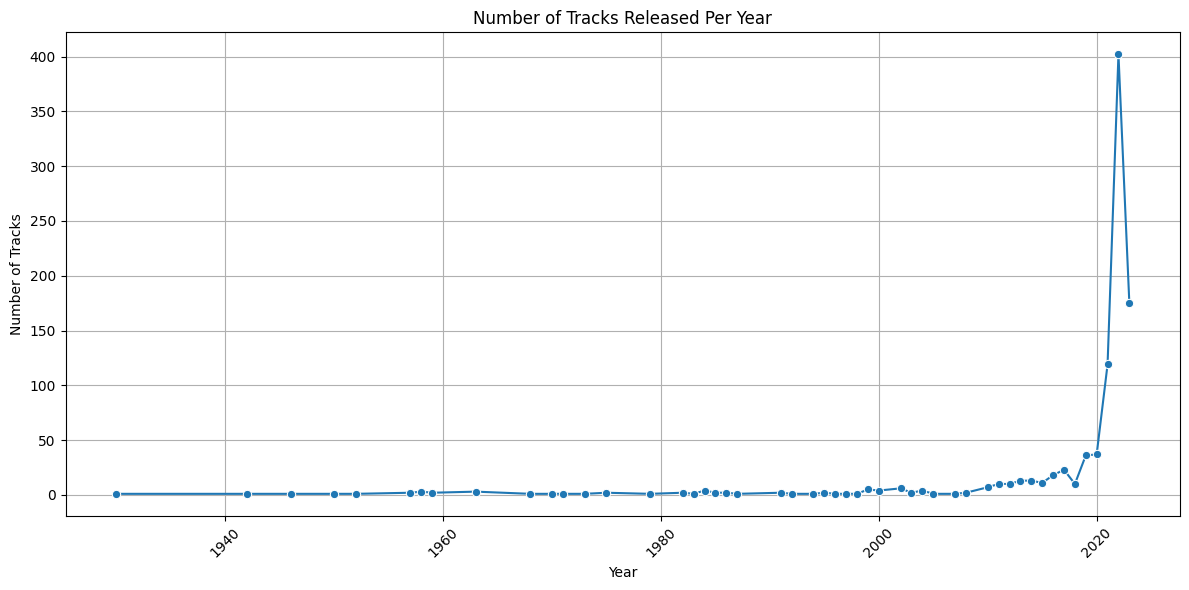

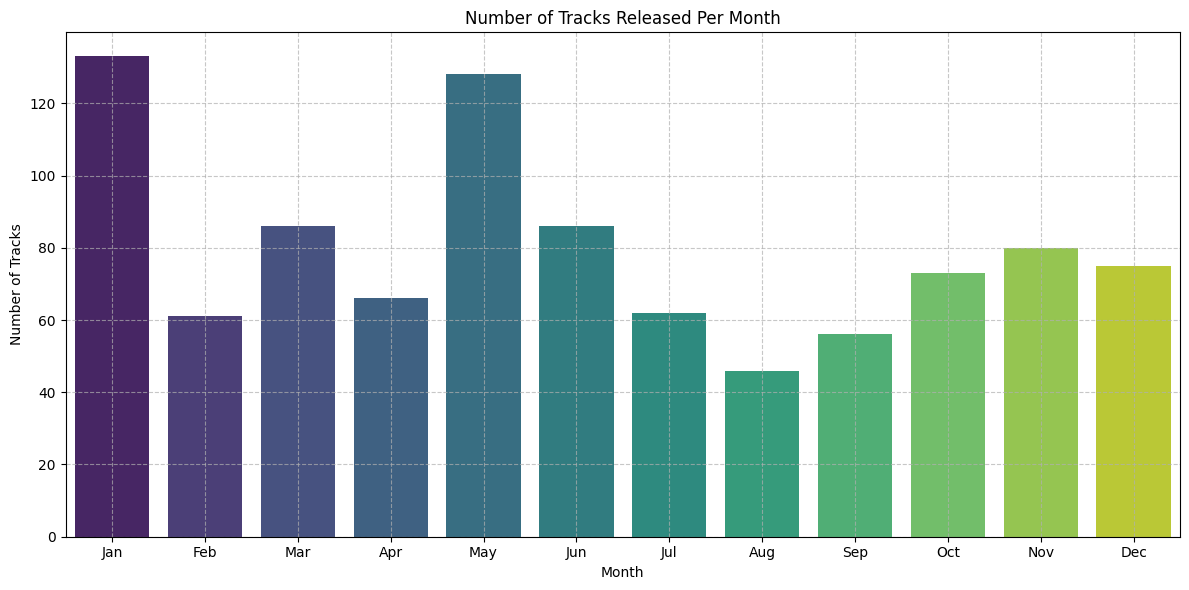

The month with the most releases is 1 (Jan) with 133 tracks.


In [8]:
# Drop rows where 'released_year' is NaN
df = df.dropna(subset=['released_year'])

# Count the number of tracks released per year and plot
tracks_per_year = df['released_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker='o')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ensure 'released_month' column is numeric and drop NaN values
df['released_month'] = pd.to_numeric(df['released_month'], errors='coerce')
df = df.dropna(subset=['released_month'])

# Count and plot the number of tracks released per month
tracks_per_month = df['released_month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=tracks_per_month.index, y=tracks_per_month.values, palette='viridis')
plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Find the month with the most releases
most_releases_month = tracks_per_month.idxmax()
most_releases_count = tracks_per_month.max()
print(f"The month with the most releases is {most_releases_month} ({['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][most_releases_month - 1]}) with {most_releases_count} tracks.")


## Analyzing Correlations Among Musical Attributes

In this step, we will investigate the correlations between various musical attributes in our dataset. Understanding these correlations can provide insights into how different characteristics of music relate to each other.

### Preparing the Data for Correlation Analysis

First, we will ensure that the relevant columns are in numeric format and drop any rows with NaN values. The attributes we will analyze include danceability, energy, valence, and acousticness.

### Correlation Matrix
Next, we will compute the correlation matrix for the selected attributes and visualize it using a heatmap. This visualization helps in identifying the strength and direction of the relationships between different musical attributes.

### Examining Individual Correlations
We will then examine specific correlations of interest between the attributes, such as the correlation between danceability and energy, and between valence and acousticness.

## Explanation of Correlation Coefficient
The correlation coefficient ranges from -1 to 1, providing a measure of the relationship between two variables:

1: Perfect positive correlation
-1: Perfect negative correlation
0: No correlation

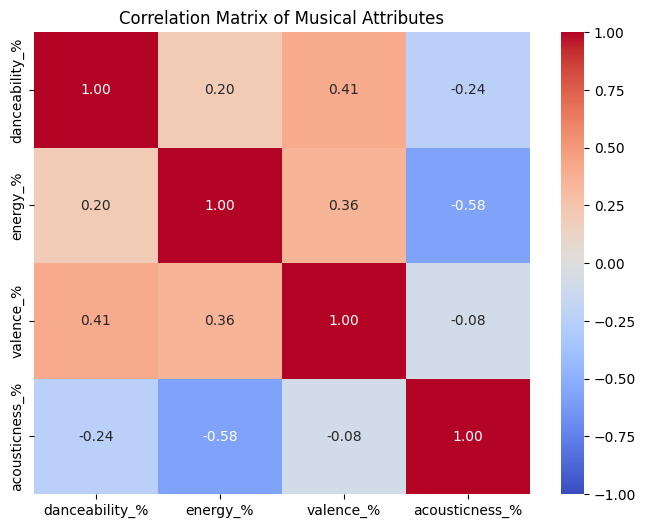

Correlation between 'danceability_%' and 'energy_%': 0.19848488212205886
Correlation between 'danceability_%' and 'valence_%': 0.40987279921202513
Correlation between 'danceability_%' and 'acousticness_%': -0.23712804263530993
Correlation between 'energy_%' and 'valence_%': 0.3575156605611934
Correlation between 'energy_%' and 'acousticness_%': -0.5773182106878039
Correlation between 'valence_%' and 'acousticness_%': -0.08116130726708855

Correlation Coefficient:
Values range from -1 to 1.
1: Perfect positive correlation.
-1: Perfect negative correlation.
0: No correlation.


In [14]:
# Ensure relevant columns are numeric and drop NaN values
df['danceability_%'] = pd.to_numeric(df['danceability_%'], errors='coerce')
df['energy_%'] = pd.to_numeric(df['energy_%'], errors='coerce')
df['valence_%'] = pd.to_numeric(df['valence_%'], errors='coerce')
df['acousticness_%'] = pd.to_numeric(df['acousticness_%'], errors='coerce')
df = df.dropna(subset=['danceability_%', 'energy_%', 'valence_%', 'acousticness_%'])

# Compute and plot the correlation matrix
correlation_matrix = df[['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Musical Attributes')
plt.show()

# Print all pairwise correlations
print("Correlation between 'danceability_%' and 'energy_%':", correlation_matrix.loc['danceability_%', 'energy_%'])
print("Correlation between 'danceability_%' and 'valence_%':", correlation_matrix.loc['danceability_%', 'valence_%'])
print("Correlation between 'danceability_%' and 'acousticness_%':", correlation_matrix.loc['danceability_%', 'acousticness_%'])
print("Correlation between 'energy_%' and 'valence_%':", correlation_matrix.loc['energy_%', 'valence_%'])
print("Correlation between 'energy_%' and 'acousticness_%':", correlation_matrix.loc['energy_%', 'acousticness_%'])
print("Correlation between 'valence_%' and 'acousticness_%':", correlation_matrix.loc['valence_%', 'acousticness_%'])

# Explanation of Correlation Coefficient
print("\nCorrelation Coefficient:")
print("Values range from -1 to 1.")
print("1: Perfect positive correlation.")
print("-1: Perfect negative correlation.")
print("0: No correlation.")


## Analyzing Platform Popularity Based on Track Streams

In this analysis, we will evaluate the popularity of tracks on various platforms by classifying tracks based on their streaming numbers. We will consider tracks in the **upper 75%** of streams to be classified as popular.

### Data Preparation

First, we will clean the dataset by dropping rows where the 'streams' value is NaN and converting the 'streams' column to integer type for further analysis.

### Count Tracks by Platform

Next, we will count the number of tracks available on different platforms without applying any popularity threshold. The platforms we will analyze include Spotify Playlists, Spotify Charts, and Apple Playlists.

### Popularity Classification

Now, we will calculate the **75th percentile** for streams and classify tracks as popular based on this threshold.


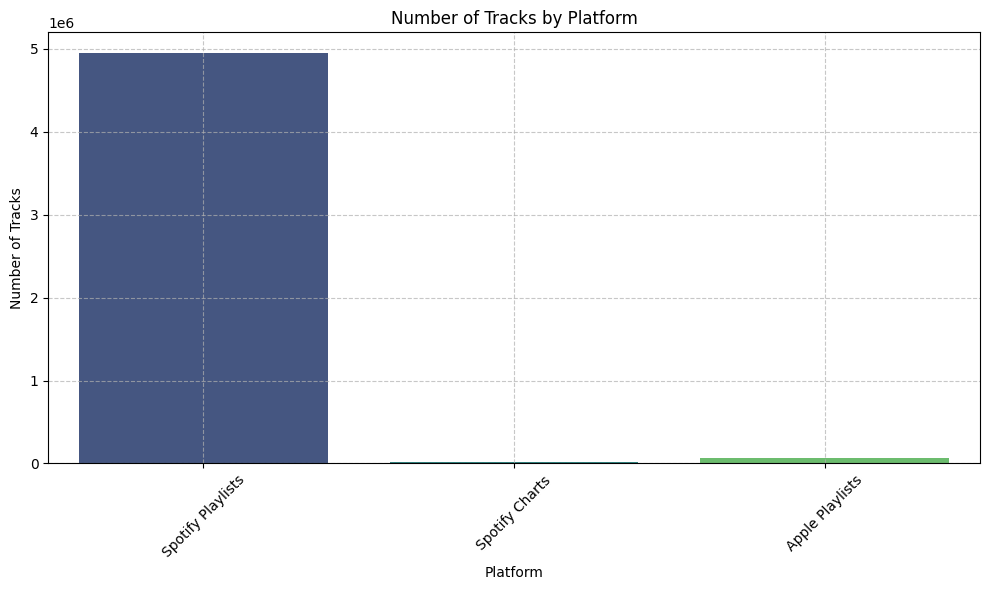

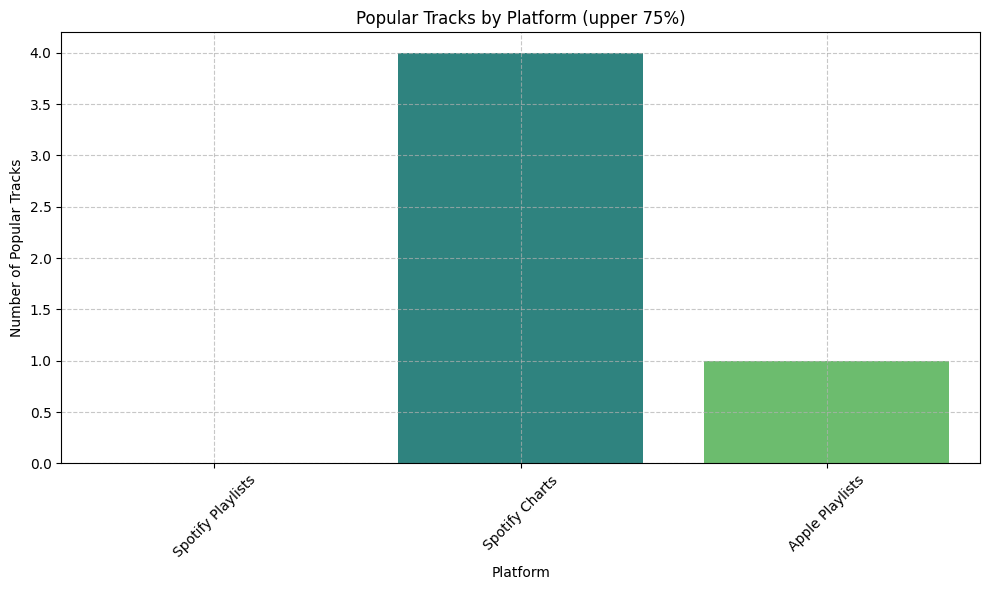

In [10]:
# Drop rows where 'streams' is NaN and convert to integer
df_cleaned = df.dropna(subset=['streams']).copy()
df_cleaned['streams'] = df_cleaned['streams'].astype(int)

# Count tracks by platform without applying the 90th percentile
track_counts = {
    'Spotify Playlists': df_cleaned['in_spotify_playlists'].sum(),
    'Spotify Charts': df_cleaned['in_spotify_charts'].sum(),
    'Apple Playlists': df_cleaned['in_apple_playlists'].sum()
}
track_counts_df = pd.DataFrame(list(track_counts.items()), columns=['Platform', 'Number of Tracks'])

# Plot number of tracks by platform
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Number of Tracks', data=track_counts_df, palette='viridis')
plt.title('Number of Tracks by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate the 90th percentile for streams and classify tracks
percentile_75 = df_cleaned['streams'].quantile(0.75)
df_cleaned['is_popular'] = df_cleaned['streams'] > percentile_75

# Count popular tracks by platform
popular_tracks_spotify_playlists = df_cleaned[df_cleaned['in_spotify_playlists'] == 1]['is_popular'].sum()
popular_tracks_spotify_charts = df_cleaned[df_cleaned['in_spotify_charts'] == 1]['is_popular'].sum()
popular_tracks_apple_playlists = df_cleaned[df_cleaned['in_apple_playlists'] == 1]['is_popular'].sum()

popular_tracks_df = pd.DataFrame({
    'Platform': ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists'],
    'Popular Tracks': [popular_tracks_spotify_playlists, popular_tracks_spotify_charts, popular_tracks_apple_playlists]
})

# Plot popular tracks by platform
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Popular Tracks', data=popular_tracks_df, palette='viridis')
plt.title('Popular Tracks by Platform (upper 75%)')
plt.xlabel('Platform')
plt.ylabel('Number of Popular Tracks')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Analyzing Streams Data Based on Key and Mode

In this analysis, we will explore how the key and mode of tracks influence the number of streams they receive. We'll calculate and visualize the mean and median number of streams for tracks grouped by their musical key and mode.

### Data Preparation

First, we convert the 'streams' column to numeric format, coercing errors to NaN values. We then drop any rows where 'streams' is NaN and convert the 'streams' column to integer type for further analysis.

### Analysis by Key

We will group the data by 'key' and calculate the mean, median, and count of streams for each key. This will help us understand how different keys perform in terms of streaming.

### Analysis by Mode
Next, we will analyze the data by 'mode' (major or minor) and calculate the mean, median, and count of streams for each mode. This will provide insights into how the mode affects track popularity.

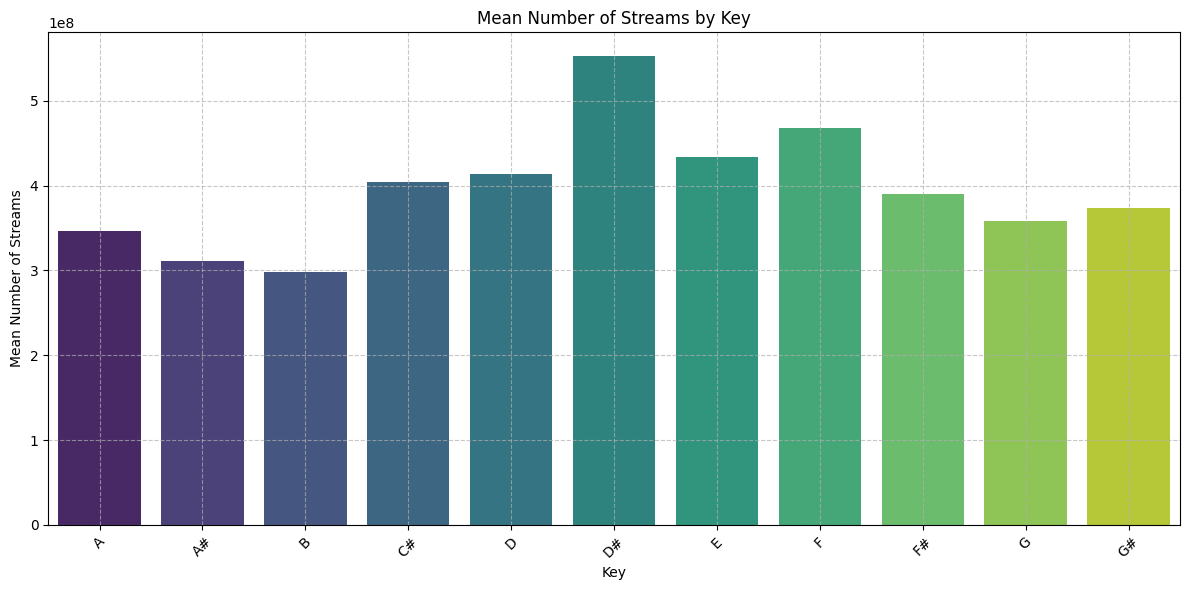

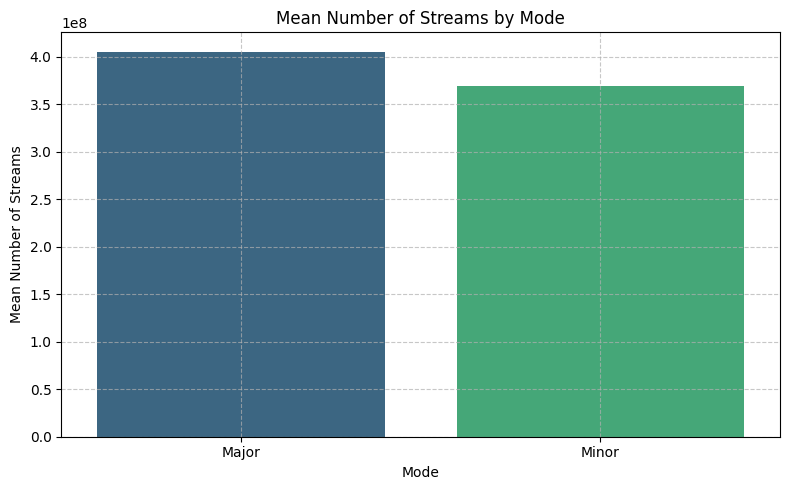

Mean and Median Streams by Key:
   Key  Mean Streams  Median Streams  Track Count
0    A  3.462428e+08     234931170.5           74
1   A#  3.114276e+08     300983101.0           57
2    B  2.978205e+08     236857112.0           81
3   C#  4.043814e+08     295307001.0          215
4    D  4.136783e+08     267758538.0           81
5   D#  5.530365e+08     273194684.0           33
6    E  4.341528e+08     235985718.5           62
7    F  4.684464e+08     255120451.0           89
8   F#  3.898570e+08     258316038.0           73
9    G  3.586427e+08     245121430.5           96
10  G#  3.731127e+08     279737940.0           91

Mean and Median Streams by Mode:
    Mode  Mean Streams  Median Streams  Track Count
0  Major  4.055661e+08     284785823.0          549
1  Minor  3.697094e+08     255932395.0          403


In [11]:
# Convert 'streams' to numeric, coercing errors (non-numeric values become NaN)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Drop rows where 'streams' is NaN
df_cleaned = df.dropna(subset=['streams']).copy()

# Convert 'streams' to integer
df_cleaned['streams'] = df_cleaned['streams'].astype(int)

# Analysis by Key
# Group by 'key' and calculate the mean and median streams
key_analysis = df_cleaned.groupby('key')['streams'].agg(['mean', 'median', 'count']).reset_index()
key_analysis.columns = ['Key', 'Mean Streams', 'Median Streams', 'Track Count']

# Plot the mean streams by key
plt.figure(figsize=(12, 6))
sns.barplot(x='Key', y='Mean Streams', data=key_analysis, palette='viridis')
plt.title('Mean Number of Streams by Key')
plt.xlabel('Key')
plt.ylabel('Mean Number of Streams')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analysis by Mode
# Group by 'mode' and calculate the mean and median streams
mode_analysis = df_cleaned.groupby('mode')['streams'].agg(['mean', 'median', 'count']).reset_index()
mode_analysis.columns = ['Mode', 'Mean Streams', 'Median Streams', 'Track Count']

# Plot the mean streams by mode
plt.figure(figsize=(8, 5))
sns.barplot(x='Mode', y='Mean Streams', data=mode_analysis, palette='viridis')
plt.title('Mean Number of Streams by Mode')
plt.xlabel('Mode')
plt.ylabel('Mean Number of Streams')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print results
print("Mean and Median Streams by Key:")
print(key_analysis)

print("\nMean and Median Streams by Mode:")
print(mode_analysis)

## Analyzing Artists and Genres in Playlists and Charts

In this analysis, we aim to identify which artists and genres consistently appear in playlists and charts. Understanding this can provide insights into trends in listener preferences and the popularity of different music styles.

### Data Preparation

We begin by cleaning the dataset, dropping any rows where essential columns—specifically 'artist(s)_name', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', and 'in_apple_charts'—contain NaN values.

### Visualization

To effectively visualize the results, we will use bar plots for the following reasons:

1. **Clarity**: Bar plots provide a clear representation of categorical data, making it easy to compare the total appearances of different artists in playlists and charts.

2. **Comparison**: By arranging artists on the y-axis and their corresponding appearances on the x-axis, we can quickly identify which artists dominate in terms of playlist and chart presence.

3. **Highlighting Differences**: Bar plots allow for easy visualization of the differences in appearances, enabling us to spot trends and outliers among the top artists.


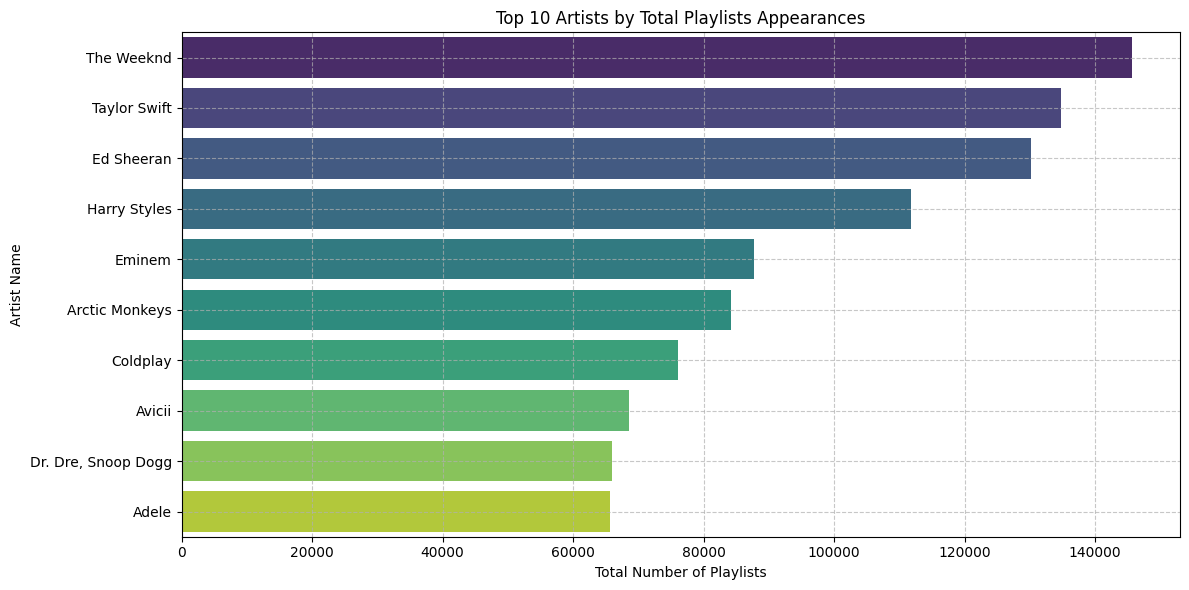

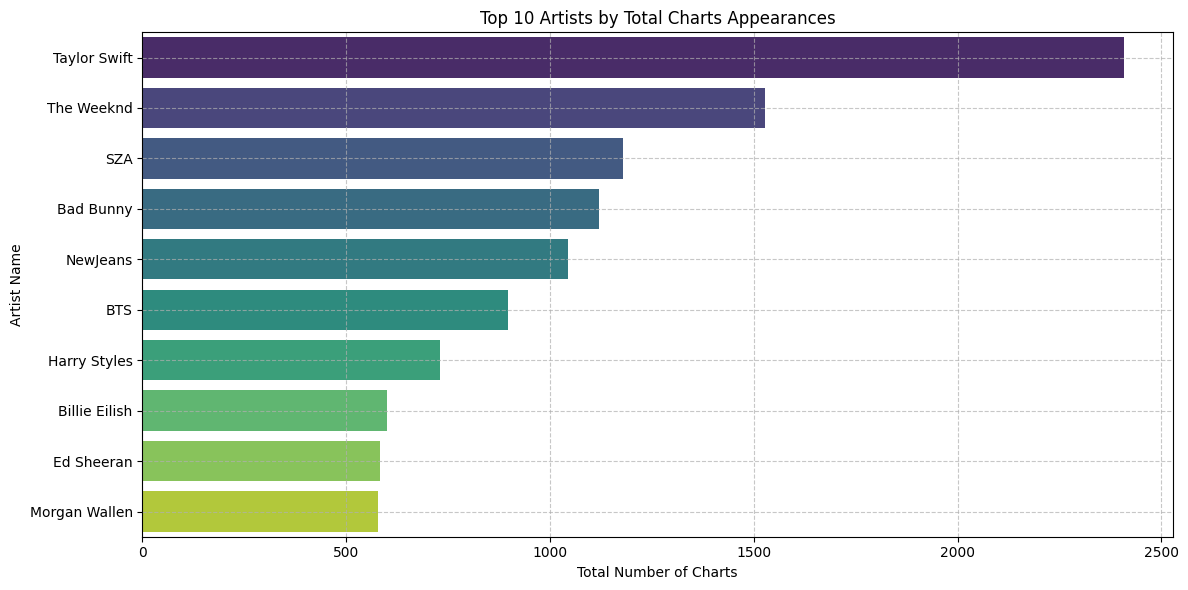

Top 10 Artists by Total Playlist Appearances:
          artist(s)_name  Total Playlists
571           The Weeknd           145730
557         Taylor Swift           134770
159           Ed Sheeran           130206
222         Harry Styles           111767
170               Eminem            87806
25        Arctic Monkeys            84257
111             Coldplay            76097
33                Avicii            68648
141  Dr. Dre, Snoop Dogg            66011
7                  Adele            65695

Top 10 Artists by Total Chart Appearances:
    artist(s)_name  Total Charts
557   Taylor Swift          2408
571     The Weeknd          1528
497            SZA          1180
43       Bad Bunny          1120
417       NewJeans          1045
38             BTS           898
222   Harry Styles           730
60   Billie Eilish           600
159     Ed Sheeran           582
395  Morgan Wallen           578


In [12]:
# Drop rows where essential columns are NaN
df_cleaned = df.dropna(subset=['artist(s)_name', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts'])

# Aggregate the data for artists
artist_appearance = df_cleaned.groupby('artist(s)_name').agg({
    'in_spotify_playlists': 'sum',
    'in_spotify_charts': 'sum',
    'in_apple_playlists': 'sum',
    'in_apple_charts': 'sum'
}).reset_index()

# Calculate total appearances in playlists and charts
artist_appearance['Total Playlists'] = (artist_appearance['in_spotify_playlists'] + artist_appearance['in_apple_playlists'])
artist_appearance['Total Charts'] = (artist_appearance['in_spotify_charts'] + artist_appearance['in_apple_charts'])

# Sort by total appearances in playlists and charts
top_artists_playlists = artist_appearance.sort_values(by='Total Playlists', ascending=False).head(10)
top_artists_charts = artist_appearance.sort_values(by='Total Charts', ascending=False).head(10)

# Plot top artists by total playlists
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Playlists', y='artist(s)_name', data=top_artists_playlists, palette='viridis')
plt.title('Top 10 Artists by Total Playlists Appearances')
plt.xlabel('Total Number of Playlists')
plt.ylabel('Artist Name')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot top artists by total charts
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Charts', y='artist(s)_name', data=top_artists_charts, palette='viridis')
plt.title('Top 10 Artists by Total Charts Appearances')
plt.xlabel('Total Number of Charts')
plt.ylabel('Artist Name')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print results
print("Top 10 Artists by Total Playlist Appearances:")
print(top_artists_playlists[['artist(s)_name', 'Total Playlists']])

print("\nTop 10 Artists by Total Chart Appearances:")
print(top_artists_charts[['artist(s)_name', 'Total Charts']])

# Spotify 2023 Dataset Analysis Findings

## 1. Data Cleaning and Preparation
- Missing values were found in **key** and **in_shazam_chart**. The latter was excluded, while the **key** column was filled with the most frequent key.

## 2. Release Trends
- From **2020** to the present, there has been a notable increase in song releases on Spotify. Single artists dominate the distribution, indicating a trend towards individual creators.

## 3. Streaming Insights
- **The Weeknd** has the most streamed track, but **Taylor Swift** is the most streamed artist, suggesting she has a greater number of hit tracks.

## 4. Monthly Release Patterns
- **January** leads in track releases, followed by **May**, potentially aligning with listeners' New Year resolutions and summer music festivals.

## 5. Correlation Analysis
- Moderate positive correlation (0.41) between **danceability** and **valence**. A strong negative correlation (-0.58) exists between **energy** and **acousticness**, indicating energetic tracks are less likely to be acoustic.

## 6. Platform Popularity
- Most tracks are from **Spotify Playlists**, but the popular tracks are featured in **Spotify Charts**, showing a distinction between broad availability and trending popularity.

## 7. Key Analysis
- **D#** is the most frequently used key, while **B** is the least. There’s no significant preference between major and minor keys, suggesting flexibility in artists' choices.

## 8. Artist Presence in Playlists and Charts
- These findings highlight **Taylor Swift**'s significant presence in both playlists and charts, showcasing her popularity across various platforms.
